 ### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read a csv file as pandas DataFrame

In [2]:
df = pd.read_csv("ford.csv")
#display(df)

###   **First five rows of the DataFrame**
###  **Last five rows of the DataFrame**

In [3]:
display(df.head(5))
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


### Here are the descriptions of the columns for the dataset

#### Target variable:  
  * **Price**: selling price of the cars 
  
#### Features:
  * **model**: list of the Ford cars
  * **year**: when the car was made
  * **transmission**:  transmission adapts the output of the internal combustion engine to the drive wheels
  * **mileage**: The mileage of a vehicle is the number of miles that it can travel using one gallon or litre of fuel
  * **fuelType**: different fuels a vehicle may use
  * **mpg**: miles per gallon the vehicle can travel
  * **engineSize**: engineSize is the volume of fuel and air that can be pushed through a car's cylinders

### Check for missing values and data types of the columns

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

### Count the number of unique values present in the 'model' column

In [5]:
model_count = df['model'].value_counts()
display(model_count.head())

 Fiesta      6556
 Focus       4588
 Kuga        2225
 EcoSport    1143
 C-MAX        543
Name: model, dtype: int64

### Count the number of unique values present in the 'year' column

In [6]:
year_count = df['year'].value_counts()
display(year_count.head())

2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
Name: year, dtype: int64

 * **No. of unique values (i.e. year)**

In [7]:
len(df['year'].unique())   # or df['year'].nunique()

22

### Count the number of unique values present in the 'transmission' column

In [8]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

### Count the number of unique values present in the 'fuelType' column

In [9]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

### Statistics for numerical columns in the Ford used cars

In [10]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


* **From this observaton, we can conclude that**
   * The oldest car in the dataset is from 1996 and latest is from 2020
   * The average price is \\$122280 the expensive and cheapest price of the car are \\$54995 and \\$495
   * The lowest mileage is 1 mile and highest mileage is 177644 miles
   * The highest mpg is 201.8
   * Engine Size varies from 0 to 5L

## Data Visualization using Different plots and graphs for catergorical and numerical variables

### Create a function to find the number of observations for unique value in a column of a DataFrame

In [11]:
def unique_value_count(data, col):
    # Get the percentage of unique values in columns
    col_count = data[col].value_counts(normalize= True)
    # making DataFrame in pandas
    col_count = pd.DataFrame(col_count) 
    # Reset index
    col_count = col_count.reset_index()  
    # rename column names in pandas DataFrame
    col_count = col_count.rename(columns = {'index': col, col: '% of Cars'}) 
    # Round a DataFrame to a variable number of decimal places
    col_count['% of Cars'] = np.round(col_count['% of Cars']*100, 2)
    return col_count

In [12]:
model_count = unique_value_count(df, 'model')
display(model_count.head())

,model,% of Cars
0,Fiesta,36.50
1,Focus,25.54
2,Kuga,12.39
3,EcoSport,6.36
4,C-MAX,3.02


In [13]:
year_count = unique_value_count(df, 'year')
#display(year_count)
# sort the year_count DataFrame based on 'year'
#year_count = year_count.sort_values(by = 'year')
display(year_count.head())

,year,% of Cars
0,2017,27.21
1,2018,22.34
2,2019,17.78
3,2016,12.98
4,2015,7.61


In [14]:
transmission_count = unique_value_count(df, 'transmission')
#display(transmission_count)

In [15]:
fuelType_count = unique_value_count(df, 'fuelType')
#display(fuelType_count)

### Create a function to show the number of observations for each unique value in a column using a barplot

In [16]:
def barplot(data, x_col, y_col, color, rotation,yticks):
    # Create a Barplot using Seaborn
    sns.barplot(x = x_col, y = y_col, data = data, color = color, alpha = 0.75)
    # Mention the label in x and y axis
    plt.xlabel( x_col)
    plt.ylabel('% of Cars')
    # Write a title for the plot
    plt.title("Percentage of Cars present for each" + x_col)
    plt.yticks(yticks)
    # rotate the x ticks for avoiding the overlap
    plt.xticks(rotation = rotation)

### Multiple Barplots side by side

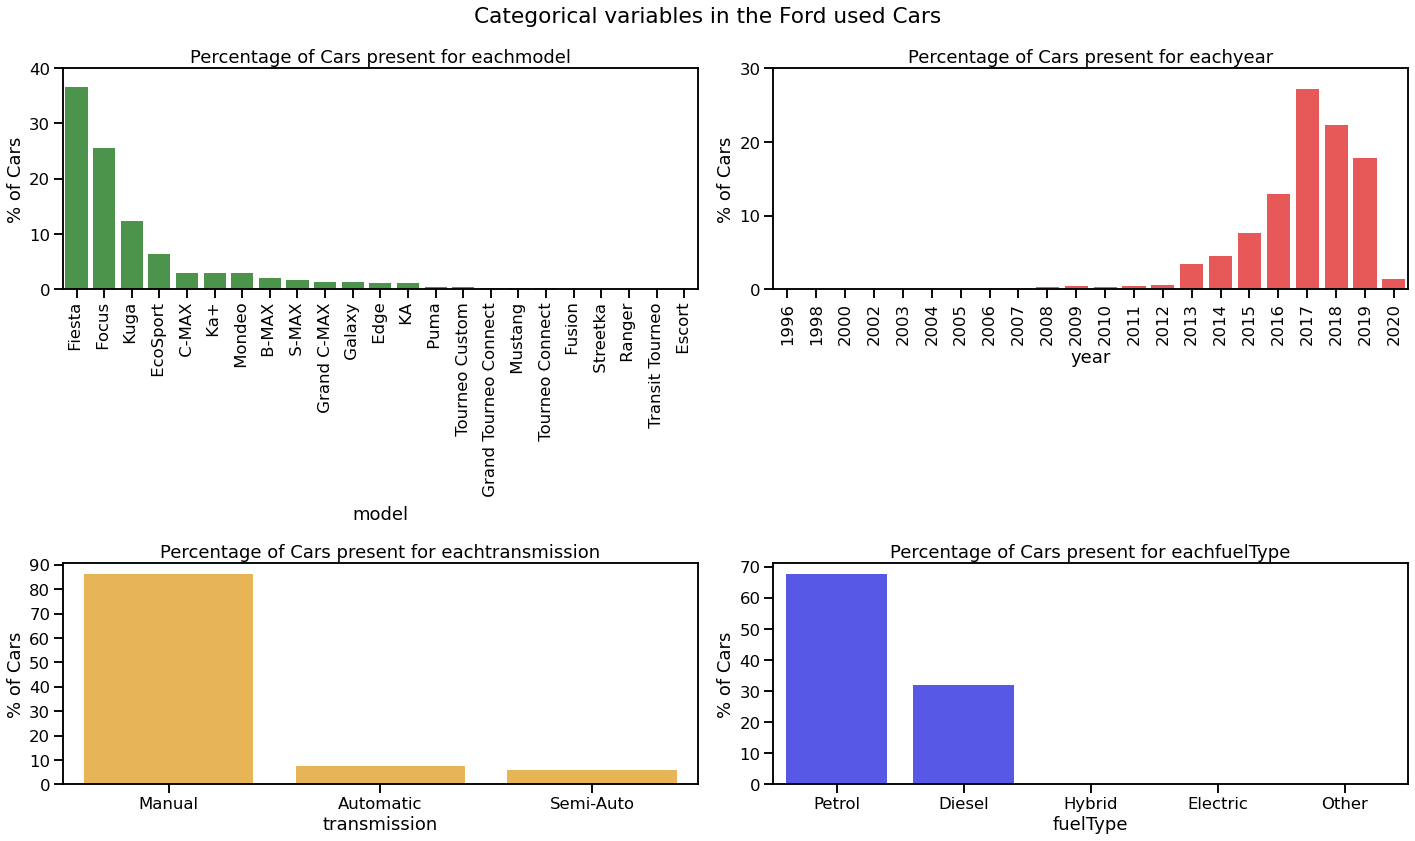

In [17]:
sns.set_context("talk") # For clear image

plt.figure(figsize = (20,12))
# Subplot 1
plt.subplot(2,2,1)
barplot(model_count,'model', '% of Cars', 'green', 90, np.arange(0,41,10))
# Subplot 2
plt.subplot(2,2,2)
barplot(year_count,'year', '% of Cars', 'red', 90, np.arange(0,31,10) )
#Subplot 3
plt.subplot(2,2,3)
barplot(transmission_count,'transmission', '% of Cars', 'orange', 0, np.arange(0,91,10))
#Subplot 4
plt.subplot(2,2,4)
barplot(fuelType_count,'fuelType', '% of Cars', 'blue', 0, np.arange(0,71,10))
# create a title for all the plots
plt.suptitle('Categorical variables in the Ford used Cars')
plt.tight_layout()
# Avoiding the unnecessary information and visualize the graph nicely
plt.show()

* **Interpretation:**

  From these Barplots, we assume that,
 * The top 4 selling car models are Fiesta, Focus, Kuga and Ecosport.
 * Most of the cars were sold from 2015 to 2019.
 * Most of the cars are manually driven.
 * Most of the car's fuel types are petrol and diesel.

### Using Scatter plot, find the relation between numerical variables of the dataset:
* mileage vs. price
* mpg vs. price

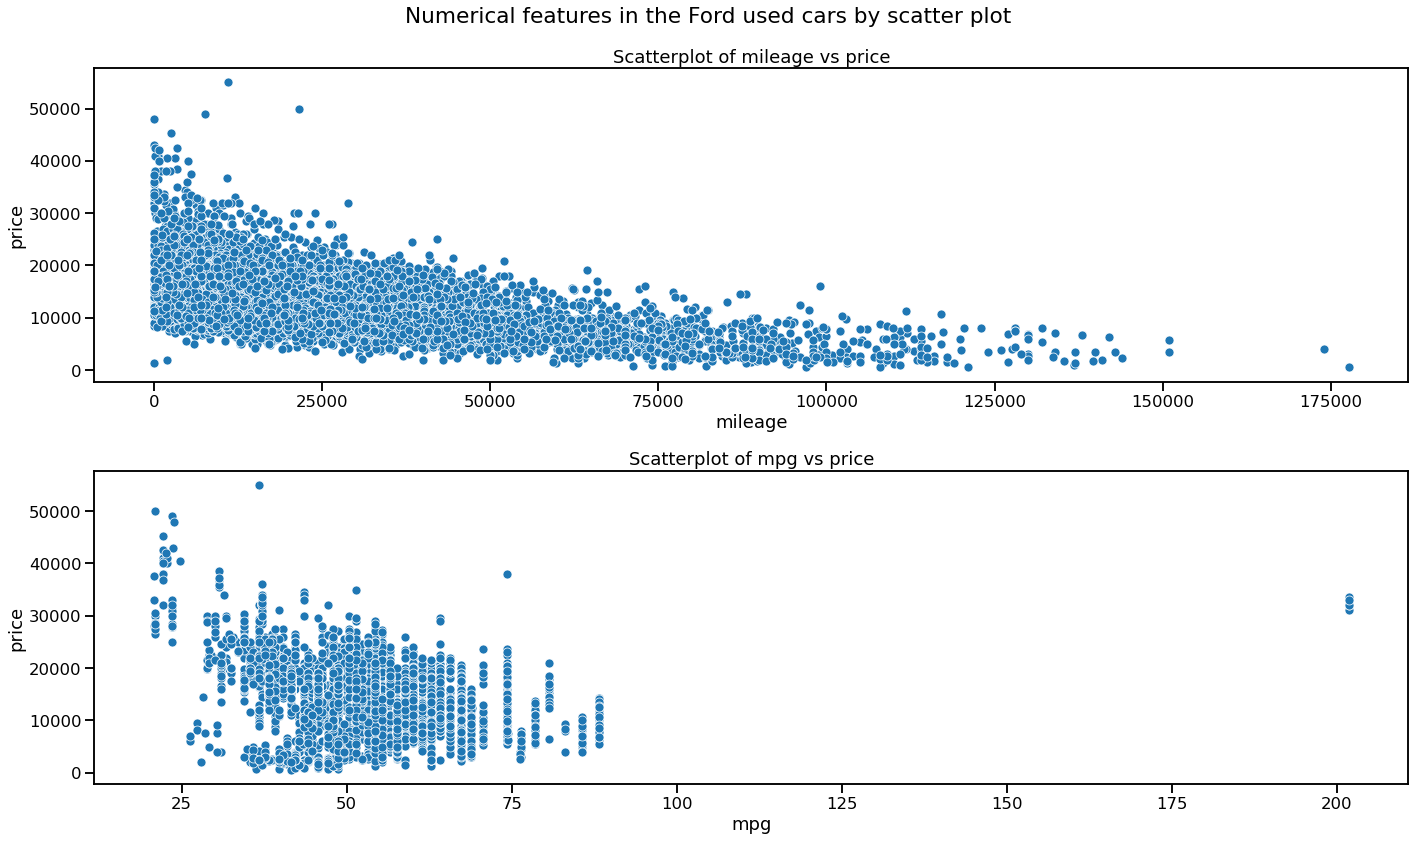

In [18]:
sns.set_context('talk')
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Scatterplot of mileage vs price")


plt.subplot(2,1,2)
sns.scatterplot(x='mpg', y='price', data=df)
plt.title("Scatterplot of mpg vs price")

plt.suptitle('Numerical features in the Ford used cars by scatter plot')

plt.tight_layout()
plt.show()

#### From these scatter plots, we can conclude that:
 * **mileage vs price**: when the mileage of the vehicle increases, the price of the vehicle decreases.
 * **mpg vs price**: when the mpg of the vehicle increases, the price of the vehicle also increases. But this is not the case always. 

### Changing the 'hue' parameter and  creating a 'Trend line'

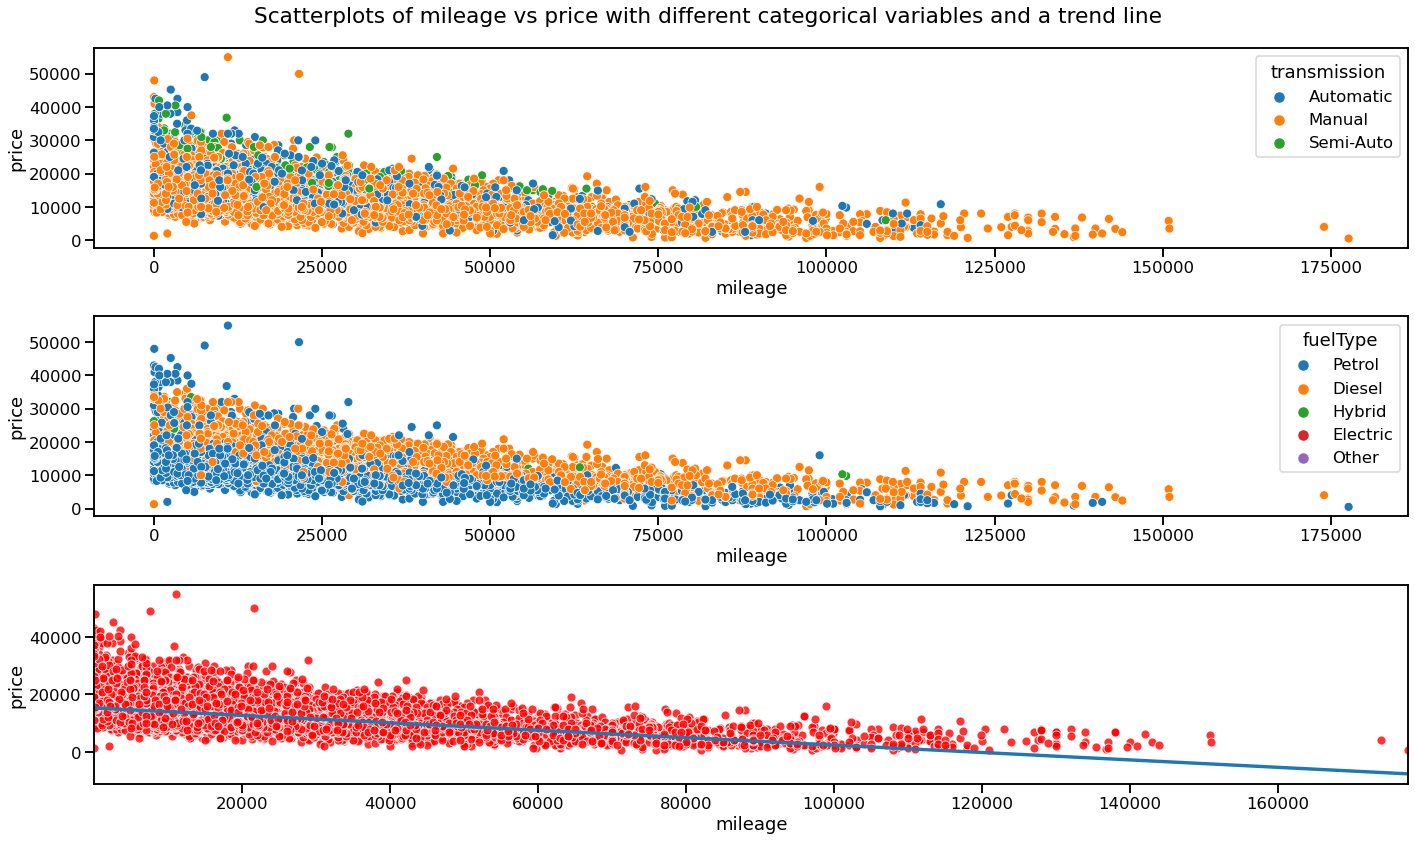

In [19]:
plt.figure(figsize=(20,12))
# adding a categorical feature: 'transmission'
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue= 'transmission')
# adding a categorical feature: 'fuelType'
plt.subplot(3,1,2)
sns.scatterplot(x='mileage', y='price', data=df, hue= 'fuelType')
# adding a trend line and changing the color of the scatter plot
plt.subplot(3,1,3)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'red','edgecolor': 'white'})

plt.suptitle("Scatterplots of mileage vs price with different categorical variables and a trend line")

plt.tight_layout()
plt.show()

#### Interpretation:
 * Adding 'transmission' as a 'hue' parameter of the first graph, we can easily differentiate which car has more mileage and identify the vehicle's price.
 * Adding 'fuelType', we can not extract the information correctly. So we can say that all categorical variables did not give us the necessary information.
 * Using 'Trendline' in the third graph, we can mislead the information because the price of the vehicle will never be negative.

### Create Histogram with numerical columns of the dataset
### Create Distribution plot with numerical columns of the dataset

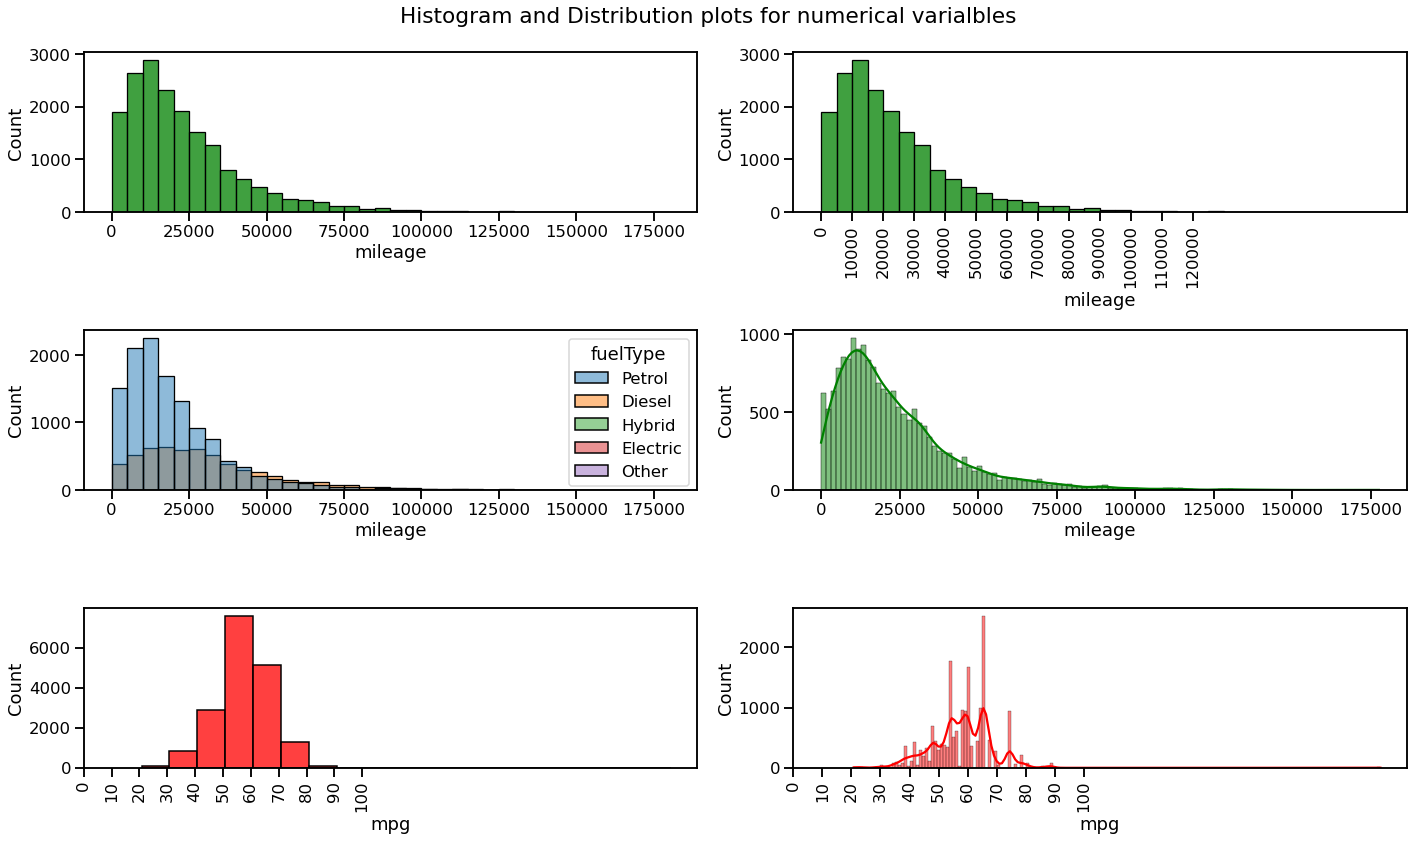

In [20]:
plt.figure(figsize=(20,12))
# Histogram of mileage
plt.subplot(3,2,1)
sns.histplot(df['mileage'],binwidth=5000,color= 'green')
# Histogram of mileage using xticks
plt.subplot(3,2,2)
sns.histplot(df['mileage'],binwidth=5000,color= 'green')
plt.xticks(np.arange(0,120001,10000),rotation=90)
# Histogram of mileage using categorical variable
plt.subplot(3,2,3)
sns.histplot(data=df,x='mileage',binwidth=5000,hue ='fuelType',color= 'green')
# Distribution plot of mileage
plt.subplot(3,2,4)
sns.histplot(data=df,x='mileage', kde=True,color= 'green',alpha=0.5)
# Histogram of mpg
plt.subplot(3,2,5)
sns.histplot(data =df, x= 'mpg',binwidth=10,color= 'red')
plt.xticks(np.arange(0,101,10),rotation=90)
# Distribution plot of mpg
plt.subplot(3,2,6)
sns.histplot(data=df, x='mpg',kde= True,color= 'red')
plt.xticks(np.arange(0,101,10),rotation=90)
plt.suptitle('Histogram and Distribution plots for numerical varialbles')
plt.tight_layout()
plt.show()

#### Obeservation:
  * From 1st two histogram plots we see that the most amount of data occured between 5000 to 25000 miles.That means the most of the car can travel between 5000 and 25000 miles.
  * The third graph with hue parameter 'fuelType' does not explain clearly that  how useful is this for visualising the data.
  * The fourth graph shows that a positively skewed distribution and unimodal distribution.
  * The fifth graph for 'mpg' variable shows that the number of occurence betwwen 50 to 70. 
  * The sixth graph shows that it is a mutimodal distrbution. 

### Create ECDF plot with numerical columns of the dataset

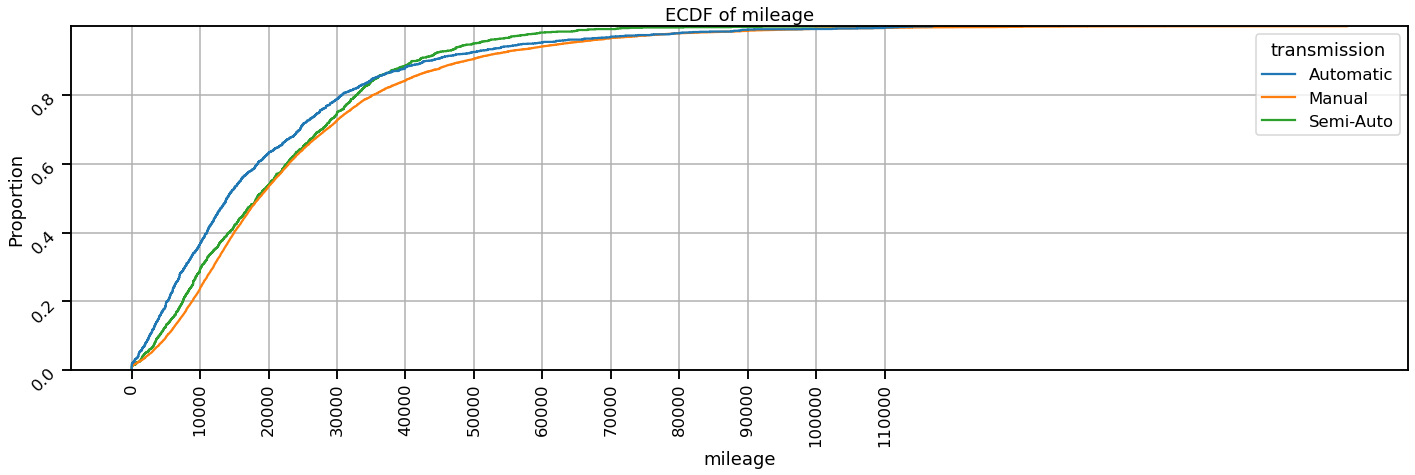

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
# ECDF plot of mileage
sns.ecdfplot(data=df, x='mileage',stat= 'proportion',hue='transmission')
plt.xticks(np.arange(0,120000,10000),rotation=90)
plt.yticks(np.arange(0,1,0.2),rotation=45)
plt.title('ECDF of mileage')
plt.grid()
#plt.subplot(2,1,2)
#sns.histplot(data=df,x='mileage',color= 'blue', binwidth=1,cumulative= True, stat= 'probability',hue='transmission')

plt.tight_layout()
plt.show()

* **It represents the empirical cumulative distribution of mileage of Ford used cars. For example, the probability of the mileage of an automatic Ford car is less than or equal to 30000 miles is approximately 0.8. The probability of the mileage of manual and semi-auto Ford cars is less than or equal to 3000 miles 0.75.**

### Create Boxplot and Violin plot with numerical columns of the dataset

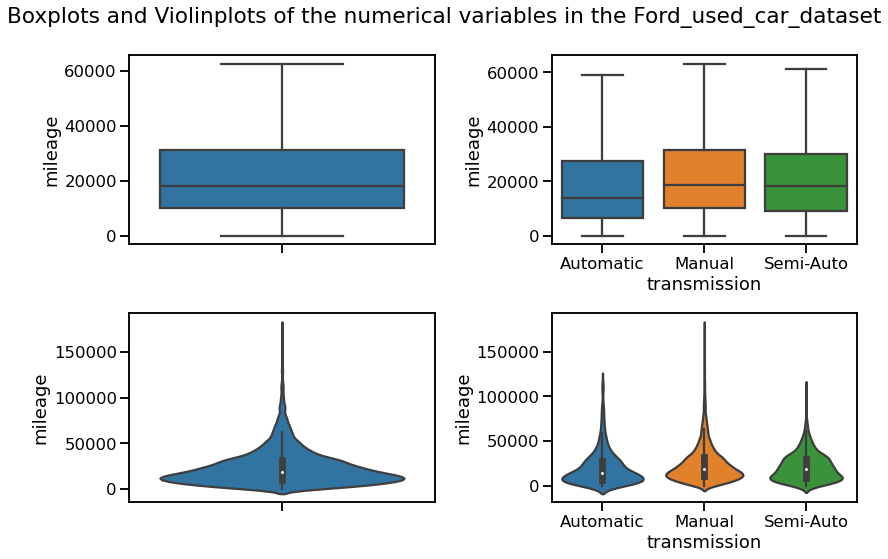

In [22]:
sns.set_context('talk')
plt.figure(figsize=(12,8))
# Boxplot of mileage
plt.subplot(2,2,1)
sns.boxplot(y=df["mileage"], showfliers=False)
# min
# first quartile (25th percentile)
# median (50th percentile)
# third quartile (75th percentile)
# max
# range = max-min
# IQR (inter-quartile range) = third quartile - first quartile
#Boxplot of mileage using categorical variable 'transmission'
plt.subplot(2,2,2)
sns.boxplot(y=df['mileage'], x=df['transmission'], dodge=False, showfliers = False)
# Violinplot of mileage
plt.subplot(2,2,3)
sns.violinplot(y=df['mileage'])
# Violinplot of mileage using categorical variable 'transmission'
plt.subplot(2,2,4)
sns.violinplot(y=df['mileage'], x=df['transmission'])
plt.suptitle("Boxplots and Violinplots of the numerical variables in the Ford_used_car_dataset")
plt.tight_layout()
plt.show()